In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load dataset 
kompas_df = pd.read_csv('../data/data_kompas_cleaned.csv')
kompas_df['source'] = 'Kompas'

# Load dataset tribunnews
tribunnews_df = pd.read_csv('../data/data_tribunnews_cleaned.csv')
tribunnews_df['source'] = 'Tribunnews'

# Menggabungkan kedua dataset
df = pd.concat([kompas_df, tribunnews_df], ignore_index=True)


In [6]:
# Presentasi data dalam bentuk persentase
category_counts = df.groupby(['source', 'category']).size().reset_index(name='count')
category_counts['percentage'] = category_counts.groupby('source')['count'].transform(lambda x: x / x.sum() * 100)

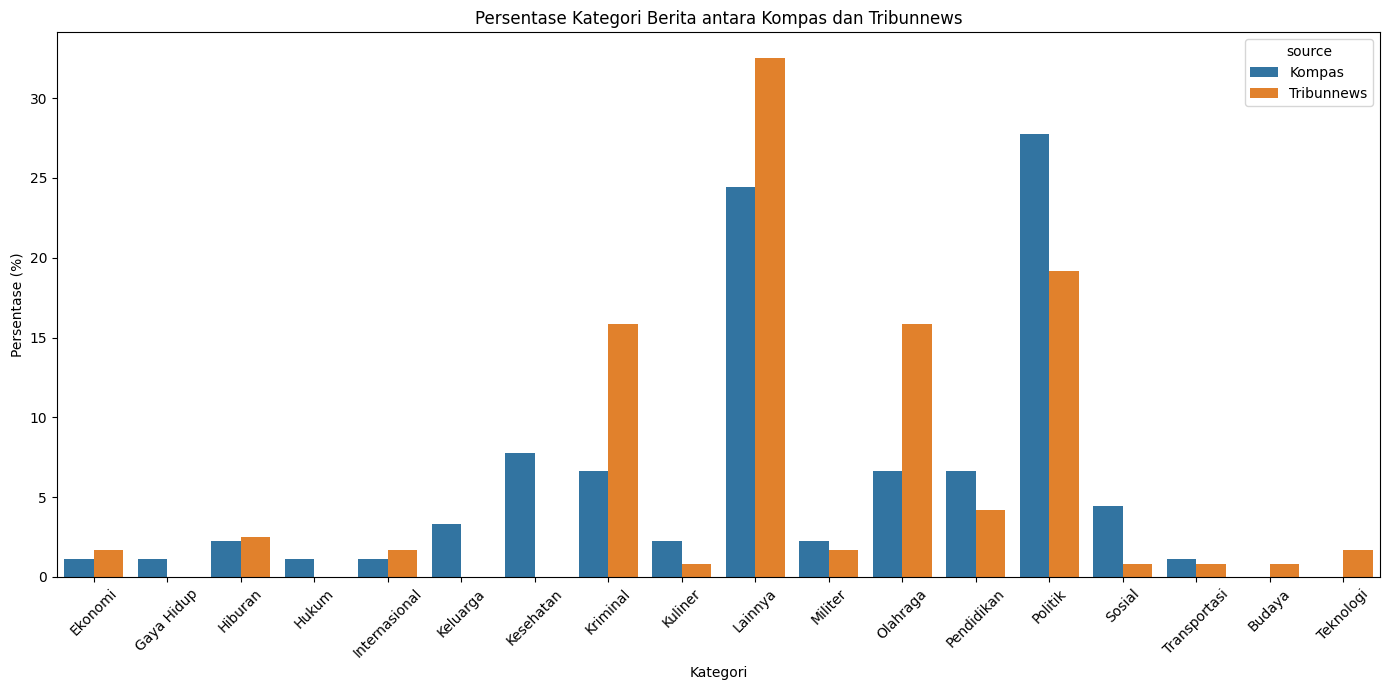

In [7]:
# Visualisasi data persentase
plt.figure(figsize=(14, 7))
sns.barplot(data=category_counts, x='category', y='percentage', hue='source')
plt.title('Persentase Kategori Berita antara Kompas dan Tribunnews')
plt.xlabel('Kategori')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()